# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

# Created a dataframe using pd for the mushrooms, which is a single csv file/dataframe.
shrooms = pd.read_csv("mushrooms.csv")
shrooms

# For the skilled mushroom hunter, picking safe-to-eat mushrooms is a relatively trouble-free task. 
# But for a beginning forager, picking the wrong mushroom could turn deadly. 
# That’s why the local Mycological Society is putting together a pamphlet for beginning mushroom hunters 
# to be able to identify edible and poisonous mushrooms based on their identifying colors, sizes, shapes, and habitats.
# This new field guide will be used for training purposes and for beginner mushroom hunter classes. 


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [5]:
# Searching columns to find percentage of missing data for each topic. 
# This data set is nice because it is realatively clean and is showing 0% missing data for all columns.
# This should lend well to creating a solid visualization in Tableau. 
for col in shrooms.columns:
    percent_missing = np.mean(shrooms[col].isnull())
    print('{}={}%'.format(col, round(percent_missing*100)))

class=0%
cap-shape=0%
cap-surface=0%
cap-color=0%
bruises=0%
odor=0%
gill-attachment=0%
gill-spacing=0%
gill-size=0%
gill-color=0%
stalk-shape=0%
stalk-root=0%
stalk-surface-above-ring=0%
stalk-surface-below-ring=0%
stalk-color-above-ring=0%
stalk-color-below-ring=0%
veil-type=0%
veil-color=0%
ring-number=0%
ring-type=0%
spore-print-color=0%
population=0%
habitat=0%


In [10]:
# Plot a missing data histogram
for col in shrooms.columns:
    missing_data = shrooms[col].isnull()
    num_missing = np.sum(missing_data)
    
    if num_missing > 0: 
        print('Missing data indicator for {}'.format(col))
        shrooms['{}_ismissing'.format(col)] = missing_data

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [9]:
# Describe to show statistical summary of common features
shrooms.describe()

# I would like to focus on class, cap-shape, cap-color, gill-size, gill-color, veil-type, 
# veil-color, spore-print-color, population, and habitat. 

# The count is uniform at 8124 for all columns and the top finds: 
# class is edible=e
# cap-shape is convex=x
# cap-surface is scaly=y
# cap-color is brown=n
# gill-size is broad=b
# gill-color is buff=b
# veil-type is partial=p
# veil-color is white=w
# spore-print-color is white=w
# populaiton is several=v
# habitat is woods=d

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


array([[<AxesSubplot:title={'center':'habitat'}>]], dtype=object)

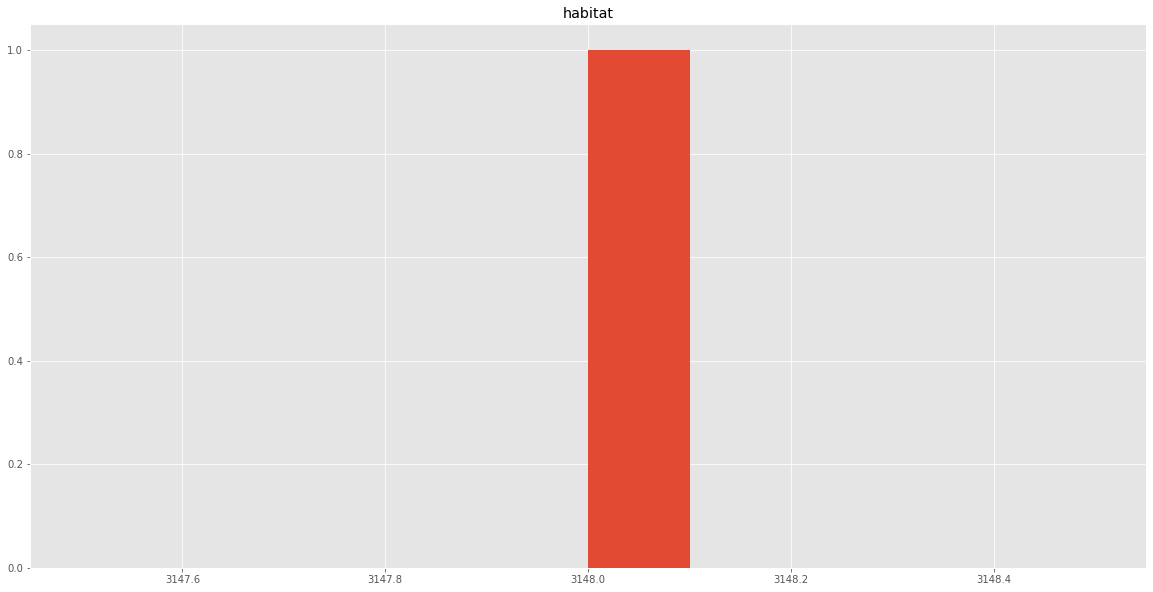

In [13]:
# A histogram to see habitat. 
import pandas as pd

shrooms=pd.DataFrame({'class': [4208],
                      'habitat': [3148]})

#view first five rows of DataFrame
shrooms.head()

#histogram
shrooms.hist(column='habitat')

In [19]:
shrooms_habitat = pd.Series(index=[2284, 1728, 7924, 4040, 3148],
                   data=['cap-color=brown', 'gill-color=buff', 'veil-color=white', 'population=several', 'habitat=woods'],
                   name='Most Commonly Found Attributes')

# display the series
print(shrooms_habitat)

2284       cap-color=brown
1728       gill-color=buff
7924      veil-color=white
4040    population=several
3148         habitat=woods
Name: Most Commonly Found Attributes, dtype: object


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [54]:
# Look for any irrelevant data in the dataframe. How will you handle it?
# Look for duplicates. How will you handle any duplicates?
# Think about what data in the dataframe may be uninformative. 
# Make note here of what situations may render data uninformative and how you would handle it?

# search for duplicates
shrooms.duplicated()
shrooms.drop_duplicates(subset=None, keep='first',inplace=False)

# duplicate rows 
duplicates=shrooms.duplicated()
duplicates.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0    False
dtype: bool>

In [81]:
import pandas as pd
import numpy as np

# dataframe
mushrooms = {
    'class': ['edible','poisonous'],
    'cap-shape': ['bell','conical','convex','flat','knobbed','sunken'],
    'cap-surface': ['fibrous','grooves','scaly','smooth'],
    'cap-color': ['brown','buff','cinnamon','gray','green','pink','purple','red','white','yellow'],
    'bruises': ['bruises','no'],
    'odor': ['almond','anise','creosote','fishy','foul','musty','none','pungent','spicy'],
    'gill-attachment': ['attached','descending','free','notched'],
    'gill-spacing': ['close','crowded','distant'],
    'gill-size': ['broad','narrow'],
    'gill-color': ['black','brown','buff','chocolate','gray','green','orange','pink','purple','red','white','yellow'],
    'stalk-shape': ['enlarging','tapering'],
    'stalk-root': ['bulbous','club','cup','equal','rhizomorphs','rooted','missing'],
    'stalk-surface-above-ring': ['fibrous','scaly','silky','smooth'],
    'stalk-surface-below-ring': ['fibrous','scaly','silky','smooth'],
    'stalk-color-above-ring': ['brown','buff','cinnamon','gray','orange','pink','red','white','yellow'],
    'stalk-color-below-ring': ['brown','buff','cinnamon','gray','orange','pink','red','white','yellow'],
    'veil-type': ['partial','universal'],
    'veil-color': ['brown','orange','white','yellow'],
    'ring-number': ['none','one','two'],
    'ring-type': ['cobwebby','evanescent','flaring','large','none','pendant','sheathing','zone'],
    'spore-print-color': ['black','brown','buff','chocolate','green','orange','purple','white','yellow'],
    'population': ['abundant','clustered','numerous','scattered','several','solitary'],
    'habitat': ['grasses','leaves','meadows','paths','urban','waste','woods']}

# adding an empty sting to correct the missing arrays
def pad_dict_list(dict_list, padel):
    lmax = 0
    for lname in dict_list.keys():
        lmax = max(lmax, len(dict_list[lname]))
    for lname in dict_list.keys():
        ll = len(dict_list[lname])
        if  ll < lmax:
            dict_list[lname] += [padel] * (lmax - ll)
    return dict_list

pad_dict_list(mushrooms, '')

shrooms=pd.DataFrame(mushrooms)

# drop multiple columns
result_shrooms=shrooms.drop(columns=['bruises', 'odor', 'gill-attachment', 'gill-spacing', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number', 'ring-type'])
print(result_shrooms)

# previous error was "arrays must all be same length" so I added a function to enter empty strings into the arrays
   
# Below was a different attempt to do a simple drop 
# shrooms=pd.DataFrame(mushrooms,columns=['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])


        class cap-shape cap-surface cap-color gill-size gill-color  \
0      edible      bell     fibrous     brown     broad      black   
1   poisonous   conical     grooves      buff    narrow      brown   
2                convex       scaly  cinnamon                 buff   
3                  flat      smooth      gray            chocolate   
4               knobbed                 green                 gray   
5                sunken                  pink                green   
6                                      purple               orange   
7                                         red                 pink   
8                                       white               purple   
9                                      yellow                  red   
10                                                           white   
11                                                          yellow   

   stalk-shape   stalk-root stalk-surface-above-ring  veil-type veil-color  \
0    enlarg

In [64]:
# Dropping the columns I don't want to use for my visualization

# This does not currently work "not found in axis"

# shrooms.drop(['bruises', 'odor', 'gill-attachment', 'gill-spacing', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number', 'ring-type'], axis =1)

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [43]:
shrooms['habitat'].isnull()

0    False
Name: habitat, dtype: bool

In [44]:
shrooms["habitat"].value_counts()
value_counts = shrooms["habitat"].value_counts()
value_counts

3148    1
Name: habitat, dtype: int64

In [45]:
shrooms["class"].value_counts()
value_counts = shrooms["class"].value_counts()
value_counts

4208    1
Name: class, dtype: int64

In [80]:
# Exporting the DataFrame as a CSV file with Comma delimiter. Can also do... "dframe.to_csv(“file_name.csv”, sep=’delimiter’)"
shrooms.to_csv(“cleaned_mushrooms.csv”)

# Fixed File Path
shrooms.to_csv('/Users\tminu\Desktop\CoderGirl\Mushrooms Final CSV')

# SyntaxError: invalid character in identifier - WHY???

# Other code to try if my previous attempt at dropping columns was not correct. 
# Export a Pandas Dataframe to CSV with only some columns
# Only certain columns
# df.to_csv('datagy.csv', columns=['Name', 'Year'])
# All columns
# df.to_csv('datagy.csv')

SyntaxError: invalid character in identifier (<ipython-input-80-e69aced53a1a>, line 2)

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

In [ ]:
# 1. I did not find all four types of dirty data in my dataset. There is no missing data, irregular data, or inconsistent data. The only unnecessary data is the data I don't plan to use for my Tableau visualization. The mushroom csv is pretty straightforward and clean.
# 2. The process of cleaning my data did provide new insights into my chosen dataset. For exampble, I was able to learn that it does not contain duplicates or missing data. By cleaning the data, I was able to learn more about the specific numbers behind my data set. The most common class of mushrooms is edible and the most commonly found habitat for mushrooms is woods. 
# 3. My only note is that I would like to create asliases for the current dataset. I could use Python to encode the various "letter" values to actually spell out what they represent.